## <center>Self-practice <center>

Using Dataset from assignment 1
1. Define, train and evaluate an ANN for Regression and Classification
1. Plot the loss and accuracy of the model for each training iteration

ANN should be implemented in PyTorch

In [59]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [60]:
class Net_c(nn.Module):
    def __init__(self, inputs=28*28, outputs=10, device='cuda'):
        self.inputs = inputs
        self.outputs = outputs
        super(Net_c, self).__init__()
        self.fc1 = nn.Linear(inputs, 500, dtype=torch.float, device=device)
        # Write 3 lines to define 3 more linear layers.
        # 2 hidden layers with number of neurons numbers: 250 and 100
        # 1 output layer that should output 10 neurons, one for each class.
        self.fc2 = nn.Linear(500, 250, dtype=torch.float, device=device)
        self.fc3 = nn.Linear(250, 100, dtype=torch.float, device=device)
        self.fc4 = nn.Linear(100, outputs, dtype=torch.float, device=device)


    def forward(self, x):
        # the linear layers fc1, fc2, fc3, and fc4
        # accepts only flattened input (1D batches)
        # while the batch x is of size (batch, 28 * 28)
        # define one line to flatten the x to be of size (batch_sz, 28 * 28)
        x = x.view(-1, self.inputs)
        x = self.fc1.forward(x)
        x = self.fc2.forward(x)
        x = self.fc3.forward(x)
        x = self.fc4.forward(x)

        out = F.log_softmax(x, dim=1, dtype=torch.double).flatten()


        return torch.vstack((out, torch.tensor(1-out, dtype=torch.double, device=device))).T


class Net_r(nn.Module):
    def __init__(self, inputs=28*28, outputs=10, device='cuda'):
        self.inputs = inputs
        self.outputs = outputs
        super(Net_r, self).__init__()
        self.fc1 = nn.Linear(inputs, 500, dtype=torch.double, device=device)
        # Write 3 lines to define 3 more linear layers.
        # 2 hidden layers with number of neurons numbers: 250 and 100
        # 1 output layer that should output 10 neurons, one for each class.
        self.fc2 = nn.Linear(500, 250, dtype=torch.double, device=device)
        self.fc3 = nn.Linear(250, 100, dtype=torch.double, device=device)
        self.fc4 = nn.Linear(100, outputs, dtype=torch.double, device=device)


    def forward(self, x):
        # the linear layers fc1, fc2, fc3, and fc4
        # accepts only flattened input (1D batches)
        # while the batch x is of size (batch, 28 * 28)
        # define one line to flatten the x to be of size (batch_sz, 28 * 28)
        x_ = x.view(-1, self.inputs)
        x_ = self.fc1.forward(x_)
        x_ = self.fc2.forward(x_)
        x_ = self.fc3.forward(x_)
        x_ = self.fc4.forward(x_)

        return x_


In [61]:
# Define training params
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 10

In [62]:
log_interval = 5
def train_c( model, device, train_loader, optimizer, epoch):
    loss_f = torch.nn.CrossEntropyLoss(torch.tensor([0.1,0.9], device=device))
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_f(output.float(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
    return loss.item()

In [63]:

def test_c( model, device, test_loader):
    loss_f = torch.nn.CrossEntropyLoss(torch.tensor([0.1,0.9], device=device))
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Do the same that was done in the previous function.
            # But without backprobagating the loss and without running the optimizers
            # As this function is only for test.
            # write 3 lines to transform the data to the device, get the output and compute the loss
            data, target = data.to(device), target.to(device)
            output = model.forward(data)
            test_loss += loss_f(output.float(), target).item()  # sum up batch loss
            correct += torch.sum((output[:, 0] > 0.5) == target)  # get the index of the max log-probability
            #correct += pred.eq(target.view_as(pred)).sum().item()
            #correct = np.sum(pred == target)/target.shape
    test_loss /= len(test_loader)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {:.2f}%'.format(
        test_loss, 100. * correct / len(test_loader.dataset)))
    return test_loss

In [64]:
x_train_c = torch.tensor(pd.read_csv('./data_/x_train_c.csv').values, dtype=torch.float)
x_test_c = torch.tensor(pd.read_csv('./data_/x_test_c.csv').values, dtype=torch.float)
y_train_c = torch.tensor(pd.read_csv('./data_/y_train_c.csv').values, dtype=torch.uint8).flatten()
y_test_c = torch.tensor(pd.read_csv('./data_/y_test_c.csv').values, dtype=torch.uint8).flatten()

x_train_r = torch.tensor(pd.read_csv('./data_/x_train_r.csv').values, dtype=torch.double)
x_test_r = torch.tensor(pd.read_csv('./data_/x_test_r.csv').values, dtype=torch.double)
y_train_r = torch.tensor(pd.read_csv('./data_/y_train_r.csv').values, dtype=torch.double).flatten()
y_test_r = torch.tensor(pd.read_csv('./data_/y_test_r.csv').values, dtype=torch.double).flatten()

Train Epoch: 0 [0/371028 (0%)]	Loss: 0.948602
Train Epoch: 0 [100000/371028 (26%)]	Loss: 0.940267
Train Epoch: 0 [200000/371028 (53%)]	Loss: 0.941476
Train Epoch: 0 [300000/371028 (79%)]	Loss: 0.932900

Test set: Average loss: 0.9322, Accuracy: 93.56%
Train Epoch: 1 [0/371028 (0%)]	Loss: 0.943093
Train Epoch: 1 [100000/371028 (26%)]	Loss: 0.931326
Train Epoch: 1 [200000/371028 (53%)]	Loss: 0.942081
Train Epoch: 1 [300000/371028 (79%)]	Loss: 0.937662

Test set: Average loss: 0.9290, Accuracy: 93.56%
Train Epoch: 2 [0/371028 (0%)]	Loss: 0.946144
Train Epoch: 2 [100000/371028 (26%)]	Loss: 0.943701
Train Epoch: 2 [200000/371028 (53%)]	Loss: 0.932900
Train Epoch: 2 [300000/371028 (79%)]	Loss: 0.946757

Test set: Average loss: 0.9330, Accuracy: 93.56%
Train Epoch: 3 [0/371028 (0%)]	Loss: 0.947986
Train Epoch: 3 [100000/371028 (26%)]	Loss: 0.937263
Train Epoch: 3 [200000/371028 (53%)]	Loss: 0.943295
Train Epoch: 3 [300000/371028 (79%)]	Loss: 0.940871

Test set: Average loss: 0.9299, Accuracy:

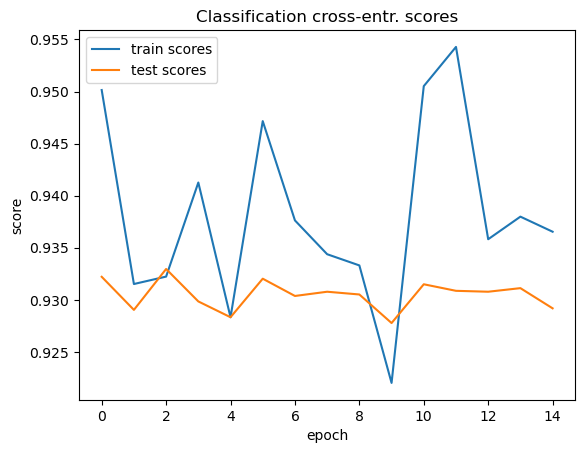

In [65]:
device = 'cuda'
model_c = Net_c(x_train_c.shape[1], 1, device)

batch_size_c = 20000
train_loader_c = DataLoader(TensorDataset(x_train_c, y_train_c),
                          batch_size=batch_size_c, shuffle=True)
test_loader_c = DataLoader(TensorDataset(x_test_c, y_test_c),
                         batch_size=batch_size_c, shuffle=True)

optimizer = optim.SGD(model_c.parameters(), lr=lr, momentum=momentum)

epochs = 15

train_scores = []
test_scores = []
for n in range(epochs):
    train_scores.append(train_c(model_c, device, train_loader_c, optimizer, n))
    test_scores.append(test_c(model_c, device, test_loader_c))

plt.title("Classification cross-entr. scores")
plt.plot(np.arange(stop=epochs), train_scores, label='train scores')
plt.plot(np.arange(stop=epochs), test_scores, label='test scores')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend()
plt.show()

In [66]:
def train_r( model, device, train_loader, optimizer, epoch):
    loss_f = torch.nn.MSELoss()
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_f(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), torch.sqrt(loss)))
    return torch.sqrt(loss)

In [67]:
def test_r( model, device, test_loader):
    loss_f = torch.nn.MSELoss()
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Do the same that was done in the previous function.
            # But without backprobagating the loss and without running the optimizers
            # As this function is only for test.
            # write 3 lines to transform the data to the device, get the output and compute the loss
            data, target = data.to(device), target.to(device)
            output = model.forward(data)
            test_loss += loss_f(output, target)

    test_loss /= len(test_loader)
    print('\nTest set: Average loss: {:.4f})\n'.format(
        torch.sqrt(test_loss)))
    return torch.sqrt(test_loss)

Train Epoch: 0 [0/373472 (0%)]	Loss: 9654.496609
Train Epoch: 0 [50000/373472 (13%)]	Loss: 9713.884500
Train Epoch: 0 [100000/373472 (26%)]	Loss: 9861.321199
Train Epoch: 0 [150000/373472 (39%)]	Loss: 9682.154487
Train Epoch: 0 [200000/373472 (53%)]	Loss: 9711.806646
Train Epoch: 0 [250000/373472 (66%)]	Loss: 9699.203766
Train Epoch: 0 [300000/373472 (79%)]	Loss: 9766.697961
Train Epoch: 0 [350000/373472 (92%)]	Loss: 9692.154674

Test set: Average loss: 9326.3393)

Train Epoch: 1 [0/373472 (0%)]	Loss: 9688.562923
Train Epoch: 1 [50000/373472 (13%)]	Loss: 9664.027596
Train Epoch: 1 [100000/373472 (26%)]	Loss: 9751.650664
Train Epoch: 1 [150000/373472 (39%)]	Loss: 9729.587240
Train Epoch: 1 [200000/373472 (53%)]	Loss: 9607.882248
Train Epoch: 1 [250000/373472 (66%)]	Loss: 9594.792505
Train Epoch: 1 [300000/373472 (79%)]	Loss: 9720.391882
Train Epoch: 1 [350000/373472 (92%)]	Loss: 9656.864367

Test set: Average loss: 9324.3512)

Train Epoch: 2 [0/373472 (0%)]	Loss: 9681.400879
Train Epoch

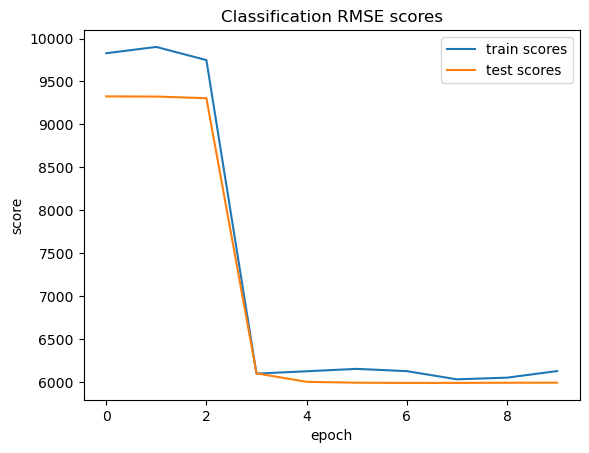

In [68]:
device = 'cuda'
model_r = Net_r(x_train_r.shape[1], 1, device)

batch_size_r = 10000
train_loader_r = DataLoader(TensorDataset(x_train_r, y_train_r),
                            batch_size=batch_size_r, shuffle=True)
test_loader_r = DataLoader(TensorDataset(x_test_r[:228000], y_test_r[:228000]),
                           batch_size=y_test_r.shape[0]//36, shuffle=True)

optimizer = optim.SGD(model_r.parameters(), lr=0.0000001, momentum=momentum)

epochs = 10

train_scores = []
test_scores = []
for n in range(epochs):
    train_scores.append(train_r(model_r, device, train_loader_r, optimizer, n).cpu().detach())
    test_scores.append(test_r(model_r, device, test_loader_r).cpu().detach())

plt.title("Classification RMSE scores")
plt.plot(np.arange(stop=epochs), train_scores, label='train scores')
plt.plot(np.arange(stop=epochs), test_scores, label='test scores')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend()
plt.show()